# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


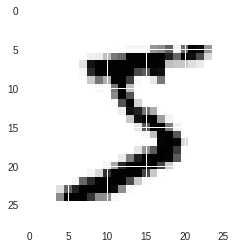

In [754]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [755]:
X_test.shape[0]

10000

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [758]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [760]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [761]:
from keras.layers import Activation, SeparableConv2D
model = Sequential()

model.add(Convolution2D(20, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(20, 3, 3, activation='relu', input_shape=(26,26,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(12,12,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 10))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu", input_shape=(26, 26, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(12, 12, 1...)`
  import sys


In [762]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_536 (Conv2D)          (None, 26, 26, 20)        200       
_________________________________________________________________
conv2d_537 (Conv2D)          (None, 24, 24, 20)        3620      
_________________________________________________________________
max_pooling2d_154 (MaxPoolin (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_538 (Conv2D)          (None, 10, 10, 16)        2896      
_________________________________________________________________
conv2d_539 (Conv2D)          (None, 10, 10, 10)        170       
_________________________________________________________________
conv2d_540 (Conv2D)          (None, 1, 1, 10)          10010     
_________________________________________________________________
flatten_149 (Flatten)        (None, 10)                0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
gen = ImageDataGenerator(rotation_range=9, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [0]:
train_generator = gen.flow(X_train, Y_train, batch_size=32)
test_generator = test_gen.flow(X_test, Y_test, batch_size=32)

In [766]:
#model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
model.fit_generator(train_generator, steps_per_epoch=60000//32, epochs=10, 
                    validation_data=test_generator, validation_steps=10000//32)

Epoch 1/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3243 - acc: 0.8991 - val_loss: 0.0696 - val_acc: 0.9780
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1306 - acc: 0.9613 - val_loss: 0.0470 - val_acc: 0.9842
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0994 - acc: 0.9702 - val_loss: 0.0359 - val_acc: 0.9895
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0846 - acc: 0.9745 - val_loss: 0.0477 - val_acc: 0.9861
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0741 - acc: 0.9773 - val_loss: 0.0342 - val_acc: 0.9882
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0670 - acc: 0.9795 - val_loss: 0.0318 - val_acc: 0.9892
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0619 - acc: 0.9811 - val_loss: 0.0317 - val_acc: 0.9896
Epoch 8/10
1875/1875 [==========================

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [768]:
print(score)

[0.02407546996923629, 0.9925]


In [0]:
y_pred = model.predict(X_test)

In [770]:
print(y_pred[:9])
print(y_test[:9])

[[1.02688746e-10 1.01036850e-08 3.90875897e-07 7.24578086e-08
  4.84115447e-14 3.75148523e-11 1.44788490e-16 9.99998569e-01
  1.63843838e-09 9.20534717e-07]
 [2.28399855e-07 4.96934227e-09 9.99999642e-01 2.91196822e-09
  9.75135736e-11 8.52774535e-12 1.16563248e-09 1.73376637e-08
  1.27575575e-07 3.84098442e-09]
 [7.86294052e-09 9.99855995e-01 1.23711857e-07 2.75573175e-10
  4.43190656e-05 5.41724262e-07 7.05135108e-06 9.09927767e-05
  1.98577567e-07 7.36723848e-07]
 [9.99919534e-01 1.55757820e-11 1.72547225e-05 2.05424039e-10
  1.07482845e-06 8.57379945e-09 4.70485647e-05 5.13844782e-07
  6.47556647e-07 1.38822079e-05]
 [2.65321792e-10 2.34481075e-08 4.08602291e-10 1.08928810e-13
  9.99995947e-01 5.43785406e-10 1.05437623e-08 1.47115713e-07
  4.31246105e-09 3.92382844e-06]
 [4.52667959e-10 9.99959230e-01 1.57701070e-08 8.14873342e-13
  9.97658208e-06 7.73799780e-09 2.14707867e-07 3.03444867e-05
  3.05339434e-08 1.50950797e-07]
 [6.71992351e-10 4.73173571e-07 1.31495582e-07 6.41614062e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [772]:
layer_dict

{'activation_151': <keras.layers.core.Activation at 0x7fd83db30470>,
 'conv2d_536': <keras.layers.convolutional.Conv2D at 0x7fd83dbb6208>,
 'conv2d_537': <keras.layers.convolutional.Conv2D at 0x7fd83dbb61d0>,
 'conv2d_538': <keras.layers.convolutional.Conv2D at 0x7fd83dbb6710>,
 'conv2d_539': <keras.layers.convolutional.Conv2D at 0x7fd83dbb6518>,
 'conv2d_540': <keras.layers.convolutional.Conv2D at 0x7fd83db6b198>,
 'dense_28': <keras.layers.core.Dense at 0x7fd83db308d0>,
 'flatten_149': <keras.layers.core.Flatten at 0x7fd83db83da0>,
 'max_pooling2d_154': <keras.layers.pooling.MaxPooling2D at 0x7fd83dbb4d30>}

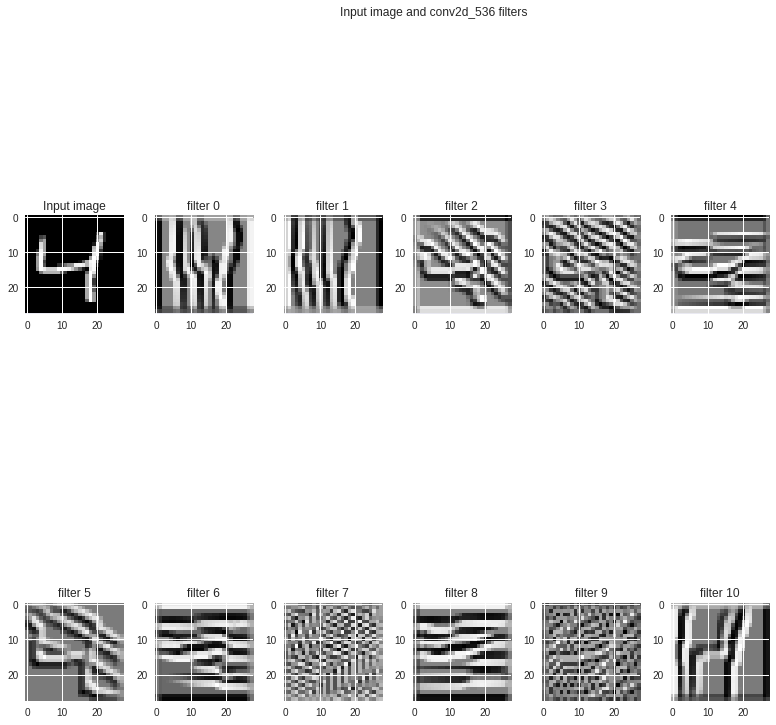

In [774]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_536'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()